<a href="https://colab.research.google.com/github/andrecamara2004/andrecamara2004.github.io/blob/main/Supervised%20Learning/Multi_Class_Prediction_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)

### Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!

### Files
train.csv - the training dataset; NObeyesdad is the categorical target

test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

train_data  = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/playground-series-s4e2/train.csv"
test_data = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/playground-series-s4e2/test.csv"

# Load the dataset
train_data = pd.read_csv(train_data)

In [64]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [66]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [67]:
train_data["NObeyesdad"].value_counts()

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


Per usual, start with some EDA, bar charts and/or correlation

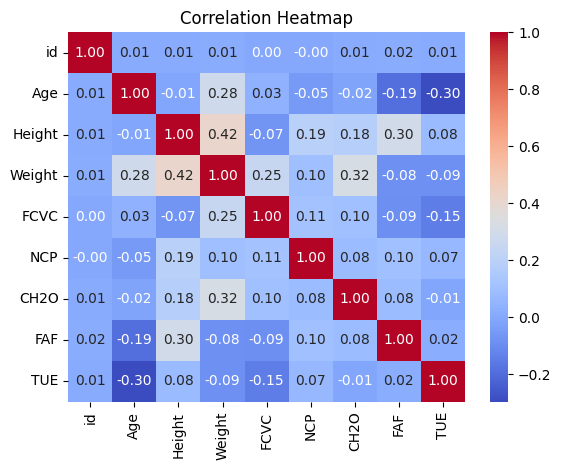

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = train_data.select_dtypes(include=['number'])

sns.heatmap(numerical_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

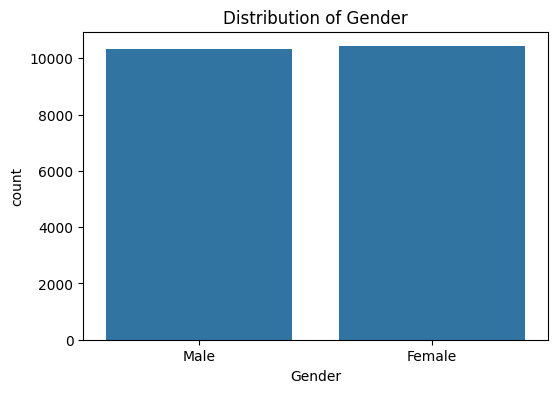

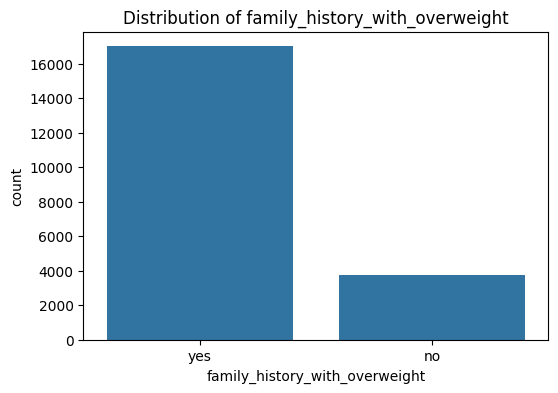

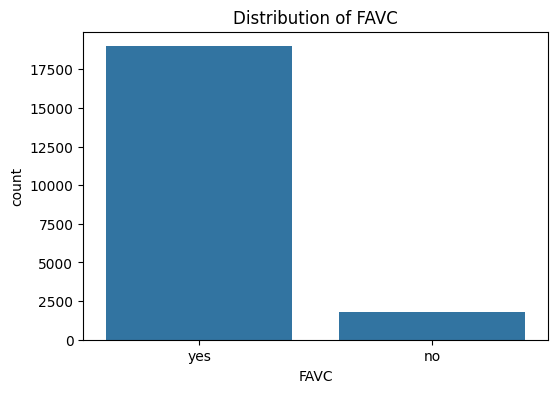

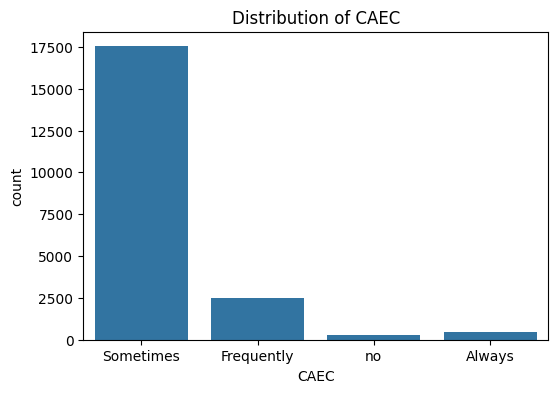

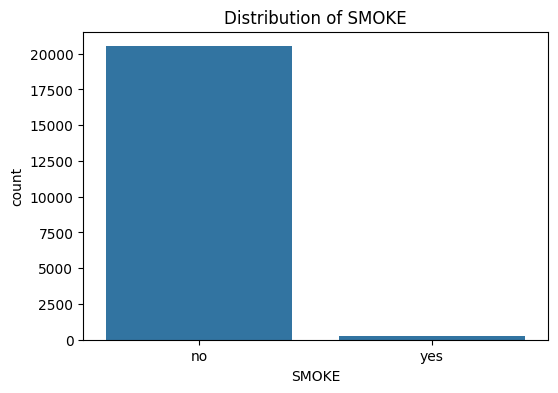

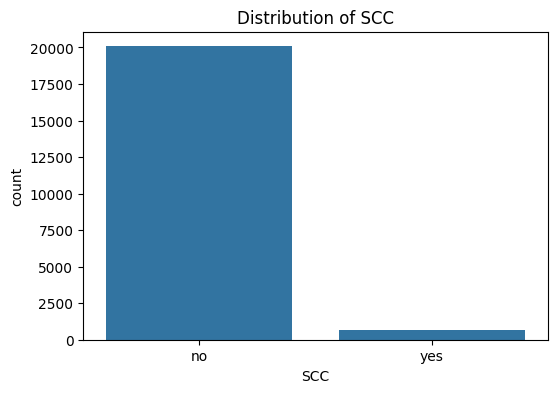

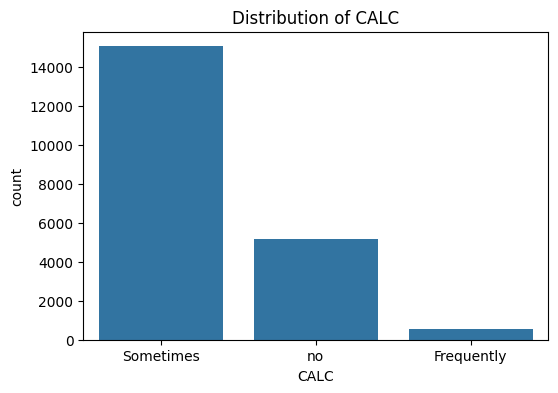

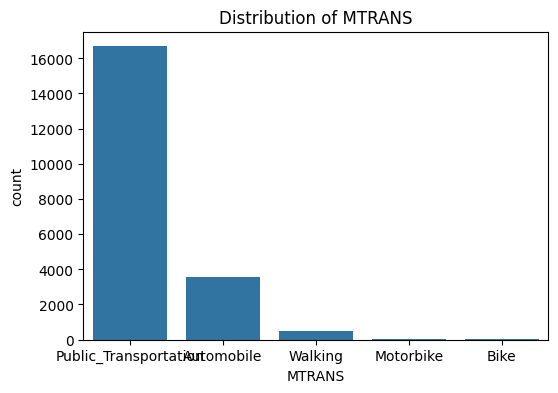

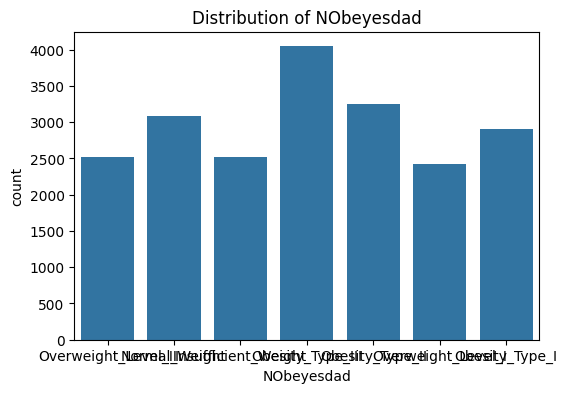

In [69]:
categorical_cols = train_data.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_data)
    plt.title(f"Distribution of {col}")
    plt.show()

Now pre-process and perform feature engineering.

P.s Use at least 5 features.

In [70]:
#p.s this is just an implementation suggestion, feel free to split it into smaller steps
def preprocess_data(data):
    """
    Preprocess the data by handling categorical values and scaling features.
    """
    # Encode features and label
    df = data.copy()

    label_encoder = LabelEncoder()
    df["label"] = label_encoder.fit_transform(train_data["NObeyesdad"])
    df["Gender"] = label_encoder.fit_transform(train_data["Gender"])
    df["family_history_with_overweight"] = label_encoder.fit_transform(train_data["family_history_with_overweight"])

    # Separate features and target
    X = df[['Age', 'Gender', 'Height', 'Weight','family_history_with_overweight']]
    y = df["label"]

    # Scale features
    # TODO
    # p.s some algorithms dont 'gain' much from scaling

    return X, y

# Preprocess training data
X, y = preprocess_data(train_data)

In [71]:
preprocess_data(train_data)


(             Age  Gender    Height      Weight  family_history_with_overweight
 0      24.443011       1  1.699998   81.669950                               1
 1      18.000000       0  1.560000   57.000000                               1
 2      18.000000       0  1.711460   50.165754                               1
 3      20.952737       0  1.710730  131.274851                               1
 4      31.641081       1  1.914186   93.798055                               1
 ...          ...     ...       ...         ...                             ...
 20753  25.137087       1  1.766626  114.187096                               1
 20754  18.000000       1  1.710000   50.000000                               0
 20755  20.101026       1  1.819557  105.580491                               1
 20756  33.852953       1  1.700000   83.520113                               1
 20757  26.680376       1  1.816547  118.134898                               1
 
 [20758 rows x 5 columns],
 0        6

Its training time i.e hyperparameter search, cross validation and evaluation.

1. [Logistic Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) - with [OVR](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) and [OVO](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)
2. KNN
3. Naive-Bayes

P.s read the documentation

In [84]:
# Preprocess training data
X, y = preprocess_data(train_data)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#Note: what about data leakage ? Is something wrong here?

#Remember to do hyperparameter search for example with https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_val)
y_pred_knn = knn.predict(X_val)
y_pred_nb = nb.predict(X_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [78]:
# Evaluation Summary
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")

evaluate_model(y_val, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_val, y_pred_knn, "KNN")
evaluate_model(y_val, y_pred_nb, "Naive Bayes")


Evaluation Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       524
           1       0.00      0.00      0.00       626
           2       0.14      0.12      0.12       543
           3       0.01      0.01      0.01       657
           4       0.24      1.00      0.39       804
           5       0.00      0.00      0.00       484
           6       0.00      0.00      0.00       514

    accuracy                           0.21      4152
   macro avg       0.06      0.16      0.08      4152
weighted avg       0.07      0.21      0.09      4152

Accuracy: 0.21
Precision: 0.07
Recall: 0.21

Evaluation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       524
           1       0.78      0.80      0.79       626
           2       0.79      0.84      0.81       543
           3       0.95      0.96      0.96       657
           4  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

## Discussion
1. Do we have a balanced dataset?
2. Which model is more balanced?
3. Any class trumps the rest?

Awesome work!

Try to submit your best results to the official kaggle competition! Pay close attention to the sample submission for it to be a valid submission.